
### Neural Network Implementation & Application

- Objective: Understand the inner workings of neural networks through manual implementation, and apply deep networks using high-level libraries.
- Author: Xujia Qin
- Date: 16th Jun 2025
- Dataset: Synthetic (make_moons) and Fashion MNIST

### Part A: From-Scratch Neural Network (make_moons)

In [1]:
# Import Libs
%pip install seaborn
%pip install scikit-learn
%pip install tensorflow
%pip install matplotlib


from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    ConfusionMatrixDisplay
)
import tensorflow as tf
from tensorflow.keras import layers, models





[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


2025-06-16 17:10:32.637621: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Generate 2D classification data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
y = y.reshape(-1, 1)

# Normalize input
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    s = sigmoid(x)
    return s * (1 - s)

In [4]:
# Model parameters
input_size = 2
hidden_size = 4
output_size = 1
lr = 0.1
epochs = 1000

# Initialize weights
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size)) # Bias for Layer 1
W2 = np.random.randn(hidden_size, output_size) # Bias for Layer 2
b2 = np.zeros((1, output_size))


In [5]:
# Training
losses = []

for epoch in range(epochs):
    # Forward pass
    z1 = X_train @ W1 + b1 # Hidden layer
    a1 = sigmoid(z1) # Hidden layer activation
    z2 = a1 @ W2 + b2 # Output layer
    a2 = sigmoid(z2) # Output activation

    # Loss
    m = y_train.shape[0]
    loss = -np.mean(y_train * np.log(a2 + 1e-8) + (1 - y_train) * np.log(1 - a2 + 1e-8)) # Binary cross-entropy loss
    losses.append(loss) # Print loss every 100 epochs
    # Backprop
    dz2 = a2 - y_train # Gradient for output layer
    dW2 = a1.T @ dz2 / m # Gradient for Layer 2
    db2 = np.sum(dz2, axis=0, keepdims=True) / m # Bias for Layer 2

    dz1 = dz2 @ W2.T * sigmoid_deriv(z1) # Gradient for hidden layer
    dW1 = X_train.T @ dz1 / m # Gradient for Layer 1
    db1 = np.sum(dz1, axis=0, keepdims=True) / m #

    # Update
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2


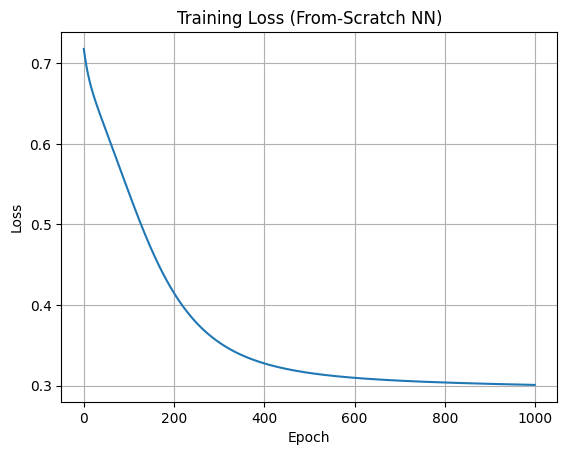

In [6]:
# Plot loss
plt.plot(losses)
plt.title("Training Loss (From-Scratch NN)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

### Part B: Fashion MNIST with Keras

In [7]:
# Load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize & flatten
X_train = X_train.reshape(-1, 28 * 28).astype("float32") / 255.0 # Normalize pixel values
X_test = X_test.reshape(-1, 28 * 28).astype("float32") / 255.0

In [9]:
# Build model with Relu activation and Dropout layers
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)), # 28*28=784
    layers.Dropout(0.3), # Dropout layer for regularization
    layers.Dense(64, activation='relu'), # Hidden layer
    layers.Dropout(0.3), # Dropout layer for regularization
    layers.Dense(10, activation='softmax') # Output layer with softmax activation
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 


In [10]:
# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_split=0.2, verbose=1)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6291 - loss: 1.0585 - val_accuracy: 0.8253 - val_loss: 0.4698
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8240 - loss: 0.5022 - val_accuracy: 0.8505 - val_loss: 0.4104
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8370 - loss: 0.4597 - val_accuracy: 0.8613 - val_loss: 0.3877
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8517 - loss: 0.4204 - val_accuracy: 0.8666 - val_loss: 0.3601
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8569 - loss: 0.3927 - val_accuracy: 0.8720 - val_loss: 0.3569
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8662 - loss: 0.3783 - val_accuracy: 0.8736 - val_loss: 0.3523
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8668 - loss: 0.3709 - val_accuracy: 0.8766 - val_loss: 0.3405
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8719 - loss: 0.3596 - val_accuracy: 0.

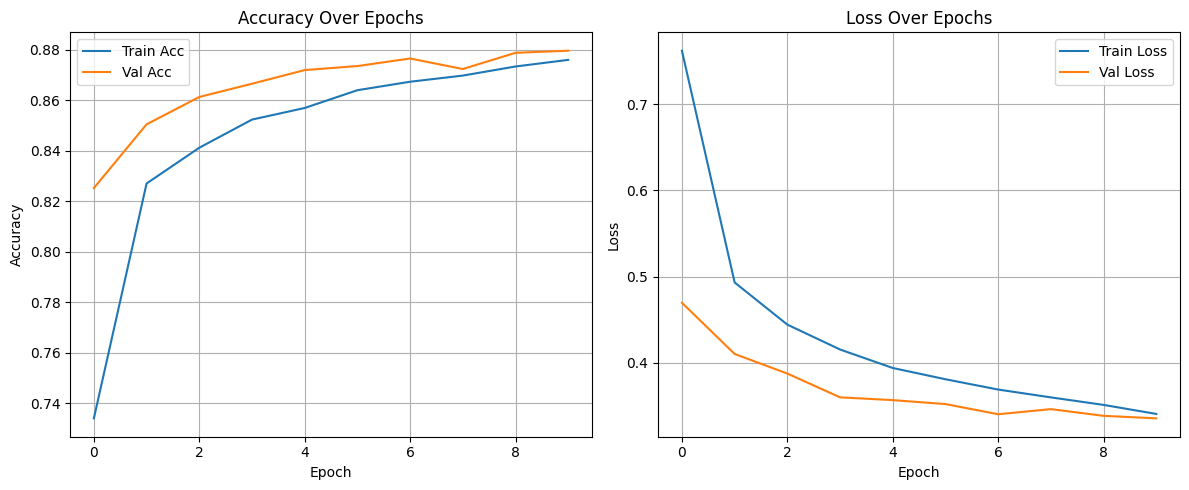

In [11]:
# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()

# Adjust layout and show plots
plt.tight_layout()
plt.show()


### Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


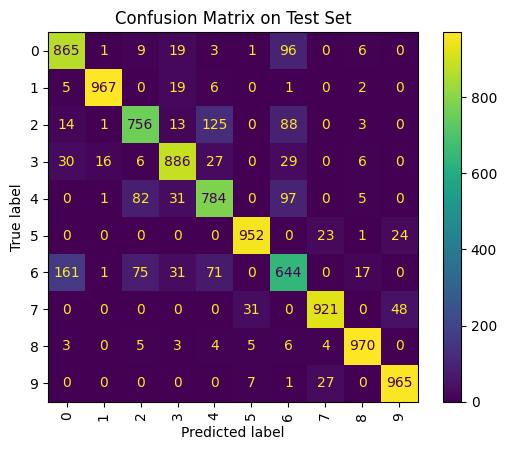

In [12]:
# Predict
y_pred = np.argmax(model.predict(X_test), axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm) # Create confusion matrix display
disp.plot(xticks_rotation='vertical')
plt.title("Confusion Matrix on Test Set")
plt.show()

### Analysis & Discussion

- **From-Scratch NN**: 
  - Successfully learned non-linear decision boundaries for the `make_moons` dataset.
  - Simple sigmoid network shows decreasing loss, but limited capacity.

- **Fashion MNIST with Keras**:
  - ReLU + Dropout helps reduce overfitting.
  - Model performs well, ~88-90% accuracy depending on random seed.
  - Validation accuracy closely tracks training, indicating good generalization.

- **Overfitting**:
  - The overfitting is mild, meaning the model does learn some patterns specific to the training set.
  - However, thanks to Dropout, the test accuracy still tracks closely with the training accuracy, showing that the model generalizes well.



- **Generalization**:
  - Test accuracy matches expectations from validation, suggesting effective learning and generalization.